In [1]:
import pandas as pd
import matplotlib.pyplot

In [27]:
y24 = pd.read_csv('data/sgnw3h2024.csv')
y24.head()


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2024,1,1,0,0,1,11.9,13.7,99.0,99.0,99.0,999,1018.7,0.0,999.0,999.0,99.0,99.0
1,2024,1,1,1,0,5,13.2,14.8,99.0,99.0,99.0,999,1019.4,-0.2,999.0,999.0,99.0,99.0
2,2024,1,1,2,0,7,13.1,14.2,99.0,99.0,99.0,999,1019.9,-0.3,999.0,999.0,99.0,99.0
3,2024,1,1,3,0,8,12.6,13.7,99.0,99.0,99.0,999,1020.7,-0.6,999.0,999.0,99.0,99.0
4,2024,1,1,4,0,4,11.1,11.6,99.0,99.0,99.0,999,1021.5,-0.7,999.0,999.0,99.0,99.0


In [29]:
y24.drop(columns=['WVHT', 'DPD', 'APD', 'MWD', 'WTMP', 'DEWP', 'VIS', 'TIDE'], inplace=True)
y24.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,PRES,ATMP
0,2024,1,1,0,0,1,11.9,13.7,1018.7,0.0
1,2024,1,1,1,0,5,13.2,14.8,1019.4,-0.2
2,2024,1,1,2,0,7,13.1,14.2,1019.9,-0.3
3,2024,1,1,3,0,8,12.6,13.7,1020.7,-0.6
4,2024,1,1,4,0,4,11.1,11.6,1021.5,-0.7


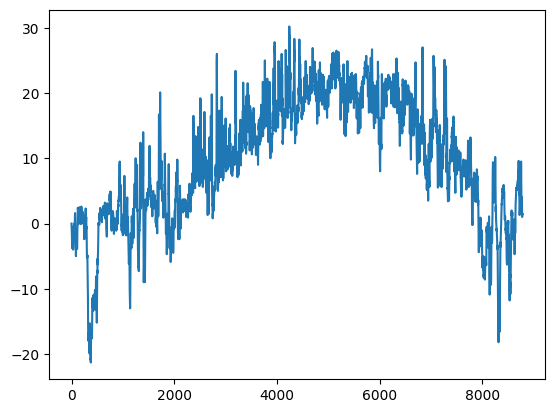

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature(feature):
    arr = np.array(y24[feature])
    t = np.arange(0, len(arr))

    plt.plot(t, arr)

plot_feature('ATMP')

In [58]:
cols = ["YY","MM","DD","hh","mm","WDIR","WSPD","GST","WVHT","DPD","APD","MWD","PRES","ATMP","WTMP","DEWP","VIS","TIDE"]
len(cols)

18

In [53]:
df = pd.read_csv(f'data/sgnw3h{2000}.csv', comment='#', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2000,1,1,0,182,1.8,2.4,99.0,99.0,99.0,999,1016.1,1.5,0.7,-4.0,99.0,NaN
1,2000,1,1,1,186,4.6,5.2,99.0,99.0,99.0,999,1015.1,1.8,0.7,-3.6,99.0,NaN
2,2000,1,1,2,197,6.9,7.8,99.0,99.0,99.0,999,1014.2,1.7,0.7,-3.6,99.0,NaN
3,2000,1,1,3,195,6.7,8.3,99.0,99.0,99.0,999,1013.5,1.4,0.8,-2.2,99.0,NaN
4,2000,1,1,4,198,7.2,8.3,99.0,99.0,99.0,999,1013.3,1.3,1.0,-2.4,99.0,NaN


In [61]:
dfs = []
for year in range(2000, 2005):
    df = pd.read_csv(f'data/sgnw3h{year}.csv', comment='#', header=None)
    cols = ["YY","MM","DD","hh","WDIR","WSPD","GST","WVHT","DPD","APD","MWD","PRES","ATMP","WTMP","DEWP","VIS","TIDE"]
    df.columns = cols

    dfs.append(df)

first_df = pd.concat(dfs)
first_df['mm'] = [0] * len(first_df)
first_df.head()

dfs = []
for year in range(2005, 2025):
    df = pd.read_csv(f'data/sgnw3h{year}.csv', comment='#', header=None)
    cols = ["YY","MM","DD","hh","mm","WDIR","WSPD","GST","WVHT","DPD","APD","MWD","PRES","ATMP","WTMP","DEWP","VIS","TIDE"]
    df.columns = cols
    dfs.append(df)

second_df = pd.concat(dfs)
df = pd.concat([first_df, second_df])


In [62]:
# def plot_feature(feature):
#     arr = np.array(df[feature])
#     t = np.arange(0, len(arr))

#     plt.plot(t, arr)
#     plt.show()

# plot_feature('ATMP')

def make_na(obj):
    if isinstance(obj, str):
        return None
    else:
        return obj

print(len(df))
df['ATMP'] = df['ATMP'].apply(make_na)
df.dropna(inplace=True)
print(len(df))



213080
209026


<Axes: >

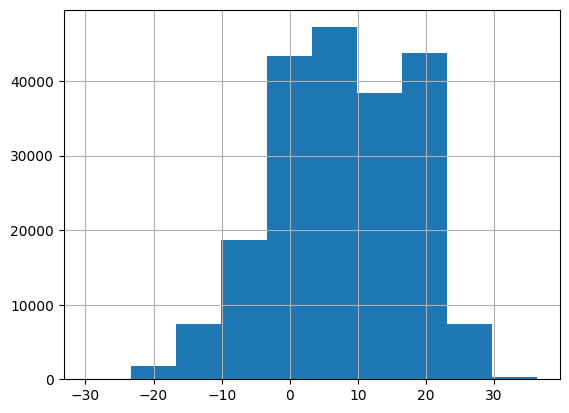

In [90]:
def plot_feature(feature, skip=50):
    arr = np.array(df[feature])[::skip]
    t = np.arange(0, len(arr))
    plt.figure(figsize=(18, 6))
    plt.scatter(t, arr)
    plt.show()


df = df[df['ATMP'] != 999]
df = df[df['WSPD'] != 99]
df['ATMP'].hist()

In [84]:
df.head()


,YY,MM,DD,hh,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,mm
4054,2000,9,23,18,354,6.2,6.7,99.0,99.0,99.0,999,1013.0,11.0,10.7,10.9,99.0,99.0,0
4055,2000,9,23,19,999,99.0,99.0,99.0,99.0,99.0,999,1013.1,11.6,10.9,11.6,99.0,99.0,0
4056,2000,9,23,20,356,6.6,7.3,99.0,99.0,99.0,999,1013.5,12.7,10.6,10.7,99.0,99.0,0
4057,2000,9,23,21,2,5.4,5.8,99.0,99.0,99.0,999,1013.8,12.0,10.8,10.4,99.0,99.0,0
4058,2000,9,23,22,350,4.4,5.3,99.0,99.0,99.0,999,1014.2,12.3,10.7,10.0,99.0,99.0,0


In [97]:
df.columns

Index(['YY', 'MM', 'DD', 'hh', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD',
       'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE', 'mm'],
      dtype='object')

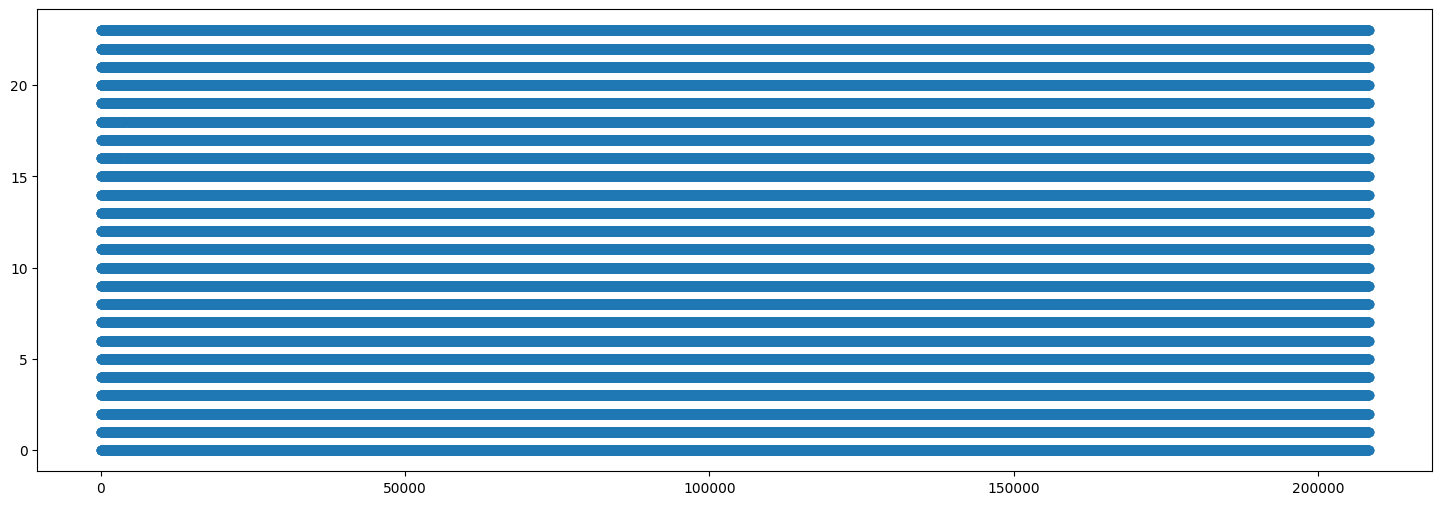

In [110]:
cols = ["YY","MM","DD","hh","mm","WDIR","WSPD","GST","WVHT","DPD","APD","MWD","PRES","ATMP","WTMP","DEWP","VIS","TIDE"]
plot_feature('hh', 1)